# Logistic Regression 

[Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression) is similar to [linear regression](/blog/ml-linear-regression/), but instead of predicting a continuous output, classifies training examples by a set of categories or labels.  For example, linear regression on a set of social and economic data might be used to predict a person's income, but logistic regression could be used to predict whether that person was married, had children, or had ever been arrested.  In a basic sense, logistic regression only answers questions that have yes / no answers, or questions that can be answered with a 1 or 0.  However, it can easily be [extended](https://en.wikipedia.org/wiki/Multinomial_logistic_regression) to problems where there are a larger set of categories.


Here, we will be using the [Rise](https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik) dataset from UCI. It maps Seven continuous variables representing characteristics of two types of rice. 

## Loading and Plotting Data

 First, we need to load the rice dataset into a Pandas DataFrame. This will allow us to explore the dataset and understand the structure.



In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import label_binarize

data = pd.read_csv('Rice_DS.csv')

data.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


## Plot the Data to Visualize the Features

Before jumping into model building, it's often a good idea to visualize the data. This gives us an understanding of how features relate to each other.



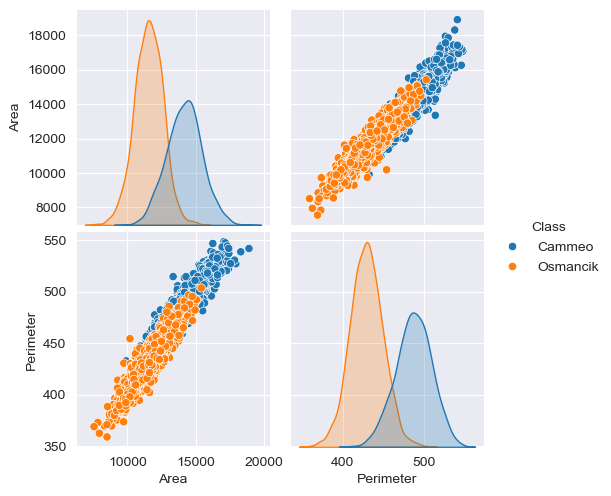

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a pairplot to visualize relationships between features 
sns.pairplot(data[['Area', 'Perimeter', 'Class']], hue='Class')
plt.show()

## Select Two Features and Encode the Target (Rice Type)
In this step, we will select only two features from the dataset and encode the rice type using `LabelEncoder`. Encoding is required because logistic regression works with numeric values, but the rice type might be labeled as "Cammeo" and "Osmancik", which are text labels.

###  Why do we need to use LabelEncoder?

`LabelEncoder` is used to convert categorical labels (e.g., Cammeo, Osmancik) into numeric values. Logistic regression requires numerical inputs, so we encode these labels into 0 and 1. This is crucial for classification tasks with algorithms like logistic regression.

In [3]:
from sklearn.preprocessing import LabelEncoder

# Select two features for the logistic regression
X = data[['Area', 'Perimeter']]  

# Encode the target labels (rice type)
y = data['Class'] 

# Use LabelEncoder to convert text labels to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # This will encode Cammeo as 0, Osmancik as 1


## Split the Data into Training and Testing Sets
Now, we split the data into training and testing sets before going further.  A simple way to do this is with the `train_test_split` function from scikit-learn, which allows me to specify a percentage (here 25%) to sample randomly from the data set and partition away for testing.

In [4]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Check the number of samples in training and testing sets
print('Training samples:', len(X_train))
print('Testing samples:', len(X_test))

Training samples: 2857
Testing samples: 953



## Simple Logistic Regression

To implement logistic regression, I need a hypothesis function $h_\theta(x)$, a cost function $J(\theta)$, and a gradient function that computes the partial derivatives of $J(\theta)$.

In logistic regression, $h_\theta$ is the [sigmoid](https://www.quora.com/Logistic-Regression-Why-sigmoid-function) function.  The sigmoid function is bounded between 0 and 1, and produces a value that can be interpreted as a probability.  This value can also be a yes / no answer with a cross-over, or decision boundary, at 0.5:
 
$$
h_\theta(x) = \frac{1}{1 + e^{ \theta^Tx}}
$$

Using [mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error) from linear regression isn't a good idea here, as the resulting cost function [isn't convex](http://mathworld.wolfram.com/SigmoidFunction.html) and so is not well-suited for gradient descent.  Instead, the difference of $h_\theta(x^i) - y^i$ is calculated differently for $y=0$ and $y=1$, and the result is [transformed](https://stackoverflow.com/questions/32986123/why-the-cost-function-of-logistic-regression-has-a-logarithmic-expression) [logarithmically](https://math.stackexchange.com/questions/886555/deriving-cost-function-using-mle-why-use-log-function) into a convex function: 

$$
J(\theta) =-\frac{1}{m}\sum_{i=1}^{m}y^{i}\log(h_\theta(x^{i}))+(1-y^{i})\log(1-h_\theta(x^{i}))
$$

Fortunately, the [derivative](https://math.stackexchange.com/questions/477207/derivative-of-cost-function-for-logistic-regression) of this function is exactly the same as that of linear regression, just with a different $h_\theta(x)$:

$$
\frac{\partial}{\partial\theta_{j}}J(\theta) =\sum_{i=1}^{m}(h_\theta(x^{i})-y^i)x_j^i
$$

## Train the Logistic Regression Model
Now that the data is prepared, we can train a logistic regression model using the two selected features.



In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Accuracy: 0.9233997901364114
              precision    recall  f1-score   support

      Cammeo       0.93      0.90      0.91       430
    Osmancik       0.92      0.94      0.93       523

    accuracy                           0.92       953
   macro avg       0.92      0.92      0.92       953
weighted avg       0.92      0.92      0.92       953



## Visualize the Decision Boundary

By plotting the decision boundary, we can visually inspect how well the logistic regression model is separating the two classes (Cammeo and Osmancik). It helps us understand the model’s decision-making process and whether the data is linearly separable. 

Since we are using only two features, we can easily plot the decision boundary to see how the model is separating the two rice types.

It is important first to convert `X_train` and `X_test` to NumPy arrays after scaling is to ensure that the dataset can be indexed correctly when performing operations like slicing, which is required for plotting and other matrix-like manipulations.



C:\Users\4311779\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


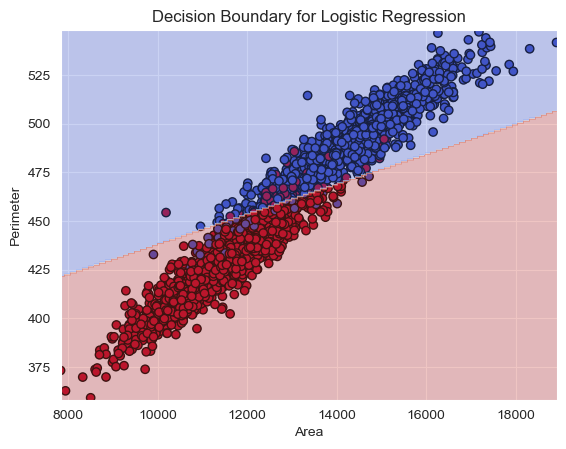

In [6]:
# Convert X_train and X_test to NumPy arrays after scaling
X_train = np.array(X_train)
X_test = np.array(X_test)

import numpy as np
import matplotlib.pyplot as plt

# Plot the data points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolors='k')

# Create a mesh grid for plotting the decision boundary
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max), np.arange(y_min, y_max))

# Predict over the grid to get the decision boundary
# ravel, flatting 2D to 1D
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.xlabel('Area')  
plt.ylabel('Perimeter')
plt.title('Decision Boundary for Logistic Regression')
plt.show()

# Regularization

To include all features from the dataset, I use `drop` to select everything except the class column (our target variable). This allows us to build the model with all available data features, without needing to specify specific columns manually.

Since we are increasing the number of features, it is essential to apply regularization to avoid overfitting. Overfitting happens when the model learns the noise and details of the training data too well, making it fail to generalize to unseen data.

Regularization introduces a penalty term in the cost function, discouraging large weights and reducing the impact of individual features. By doing so, it softens the fit to the training data, making the model more generalizable. In logistic regression, L2 regularization (Ridge) is the default, which penalizes the square of the coefficients. This reduces the magnitude of the weights, helping prevent overfitting.

In practice, the regularization strength is controlled by the parameter `C`:

- Smaller values of `C` indicate stronger regularization, leading to simpler models with more muted feature weights.
- Larger values of `C` reduce the effect of regularization, allowing the model to fit the data more closely.

We introduce `L2 regularization` by specifying `penalty='l2'` in the LogisticRegression model. This adds a penalty for large weights and prevents overfitting, particularly when the number of features is large.
- `penalty='l2'` applies L2 regularization.
- `C=1.0` is the regularization strength. A lower C value increases regularization.

By applying regularization, we ensure that the model remains robust when using a larger set of features, helping it avoid overfitting and improving performance on unseen data.





In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


# Select all features except the target column 
X = data.drop('Class', axis=1)  # 'class' is the target column
y = data['Class']  # The target column (rice type)

# Encode the target variable 
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the logistic regression model with L2 regularization (Ridge)
# Regularization strength can be adjusted by the C parameter (smaller C = stronger regularization)
model = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.9359916054564533
              precision    recall  f1-score   support

      Cammeo       0.94      0.92      0.93       430
    Osmancik       0.93      0.95      0.94       523

    accuracy                           0.94       953
   macro avg       0.94      0.93      0.94       953
weighted avg       0.94      0.94      0.94       953



## logistic Regression from Scratch

In [8]:
import numpy as np
N = 100
x1 = np.random.randn(N, 2) + np.array([[1,2]])
y1 = np.ones((N, 1))
x2 = np.random.randn(N, 2) + np.array([[-1,-2]])
y2 = np.zeros((N, 1))

X = np.concatenate([x1, x2], axis=0)
y = np.concatenate([y1, y2], axis=0)
# adding bias as the first columns
v = np.ones((X.shape[0], 1))
X = np.concatenate([v, X], axis = 1)

In [9]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss function (Binary Cross-Entropy)
def loss_fn(yhat, y):
    return np.mean(-y * np.log(yhat + 1e-7) - (1 - y) * np.log(1 - yhat + 1e-7), axis=0)

Epoch 0: Loss = [1.76351553]
Epoch 100: Loss = [0.29832541]
Epoch 200: Loss = [0.17459959]
Epoch 300: Loss = [0.13321468]
Epoch 400: Loss = [0.11239521]
Epoch 500: Loss = [0.09962661]
Epoch 600: Loss = [0.09083313]
Epoch 700: Loss = [0.08431408]
Epoch 800: Loss = [0.07923459]
Epoch 900: Loss = [0.07513446]


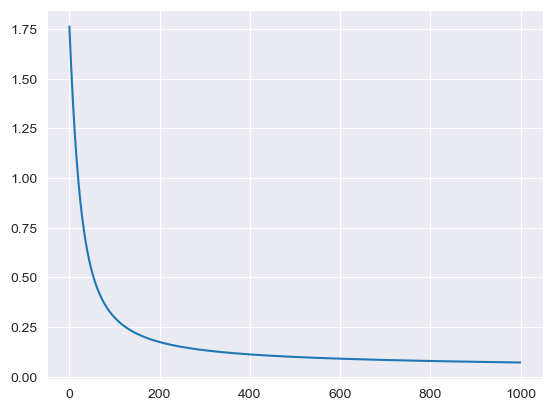

In [10]:
epochs = 1000
lr = 1e-4
ls = []
# w represents theta
w = np.random.randn(3, 1)
# Gradient descent loop
for i in range(epochs):
    # Forward pass
    z = X @ w
    yhat = sigmoid(z)
    
    # Compute loss
    loss = loss_fn(yhat, y)
    ls.append(loss)
    
    # Print loss at each epoch
    if i % 100 == 0:  # Print every 100 epochs (optional)
        print(f'Epoch {i}: Loss = {loss}')
    
    # Backward pass (gradient of the loss function)
    dw = X.T @ (yhat - y)
    
    # Update weights
    w = w - lr * dw

plt.plot(ls)

## Activity1
Update logistic regression (the one from scratch) make it on Rice dataset and plot the results